<a href="https://colab.research.google.com/github/Zwarzen/-02_praktikum_web_lanjut_satu/blob/master/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Inverse Citra

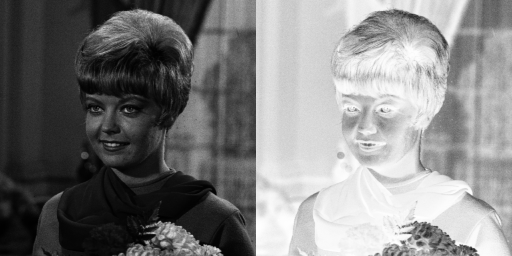

In [33]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

image_risang = cv2.imread('/content/drive/MyDrive/Images/female.tiff', 0)
inverted = np.invert(image_risang)
image_risang2 = image_risang #np.zeros(image_risang.shape, image_risang.dtype)

cv2.imwrite('inverted.jpg', inverted)
final_frame = cv2.hconcat((image_risang, inverted))
cv2_imshow(final_frame)

# Transformasi Log

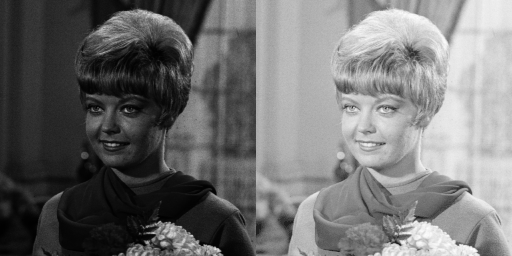

In [42]:
#image_risang2 = image_risang #np.zeros(image_risang.shape, image_risang.dtype)

# Metode log transformation
rumus = 255 / np.log(1 + np.max(image_risang2))
log_gambar = rumus * (np.log(image_risang2 + 1))
   
# Spesifikasikan tipe data agar
# value dari float di konversi ke int
log_gambar = np.array(log_gambar, dtype = np.uint8)
   
# Display gambar
final_frame = cv2.hconcat((image_risang, log_gambar))
cv2_imshow(final_frame)

# Gamma Correction

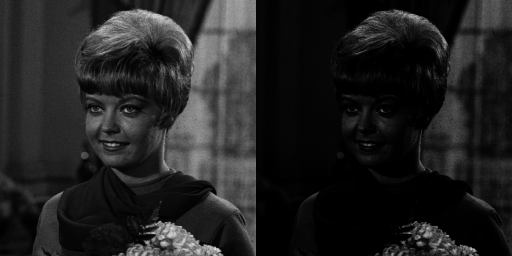

In [43]:
# Trying 4 gamma values.
for gamma in [0.1, 0.5, 1.2, 2.2]: #0.1, 0.5, 1.2, 2.2
      
    # Apply gamma correction.
    koreksi_gamma = np.array(255*(image_risang2 / 255) ** gamma, dtype = 'uint8')
  
    # Save edited images.
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', koreksi_gamma)



final_frame = cv2.hconcat((image_risang, koreksi_gamma))
cv2_imshow(final_frame)

# Image bit-Depth

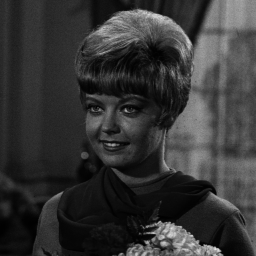

In [46]:
mode_to_bpp = {'1':1, 'L':8, 'P':8, 'RGB':24, 'RGBA':32, 'CMYK':32, 'YCbCr':24, 'I':32, 'F':32}

#image_risang3 = (image_risang.depth)

cv2_imshow(image_risang)

# PSNR - Peak Signal-to-Noise Ratio

In [55]:
from math import log10, sqrt

def PSNR(image_risang, image_risang2):
    mse = np.mean((image_risang - image_risang2) ** 2)
    if(mse == 0):  # MSE adalah nol maka tidak ada suara pada sinyal .
                  # olehkarna itu PSNR tidak diperlukan.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     image_risang = cv2.imread("/content/drive/MyDrive/Images/female.tiff")
     image_risang2 = cv2.imread("/content/drive/MyDrive/Images/female.tiff", 1)
     value = PSNR(image_risang, image_risang2)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 100 dB


# Average Denoising

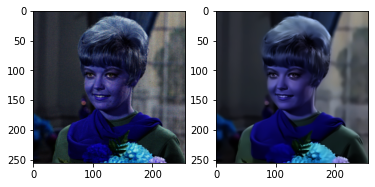

In [58]:
img_risang = cv2.imread('/content/drive/MyDrive/Images/female.tiff')
  
# denoising of image saving it into dst image
dst = cv2.fastNlMeansDenoisingColored(img_risang, None, 10, 10, 7, 15)
  
# Plotting of source and destination image
plt.subplot(121), plt.imshow(img_risang)
plt.subplot(122), plt.imshow(dst)
  
plt.show()